<a href="https://colab.research.google.com/github/dqminhv/fellowship_ai-nlp-challenge/blob/main/nlp_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Required Packages & Load Data

In [1]:
#Ignore warnings in Google Colab
import warnings
# Ignore all warnings (not recommended in general)
warnings.filterwarnings("ignore")

In [2]:
#Mount Google Drive to access the IMDB Review file
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [4]:
#Load csv file to a pandas DataFrame
file_path = '/content/gdrive/MyDrive/Document/Data Science/Skills Development/fellowshipai/imdb-dataset.csv'
imdb_db = pd.read_csv(file_path)

In [5]:
#Check for data type and missing values
imdb_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
#Look at the first few records of the dataset
imdb_db.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Data Cleaning

In [7]:
#Create a text cleaning function to clean and lemmatize the review feature
def clean_text(text):
    """
    Cleans text that is suitable for TF-IDF analysis.
    Args:
    text: A string containing the text to be cleaned.
    Returns:
    A cleaned string suitable for TF-IDF analysis.
    """
    stop=set(stopwords.words("english"))
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove URLs
    text = re.sub(r'[^\s]+@.*?\s+', '', text)
    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Remove underscores
    text = re.sub(r'_', '', text)
    # Remove single characters
    text = re.sub(r'\s+', ' ', text)
    # Remove multiple spaces
    text = text.strip()
    # Remove stop words
    text = " ".join([word for word in text.split() if word not in stop])

    # Lemmatizing
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])

    return text.lower()

In [8]:
#Clean the contents of the review feature
imdb_db['review'] = imdb_db['review'].apply(clean_text)

In [9]:
imdb_db['review'].head()

0    one reviewer mentioned watching oz episode you...
1    a wonderful little production the filming tech...
2    i thought wonderful way spend time hot summer ...
3    basically there family little boy jake think t...
4    petter matteis love time money visually stunni...
Name: review, dtype: object

# Exploratory Data Analysis



*   How many positive/negative reviews
*   Review length vs sentiment
*   What are the most frequent words for positive/negative reviews



## Sentiment Labels Distribution

In [15]:
# Find the number of positive and negative reviews
print('Number of positive and negative reviews: ', imdb_db['sentiment'].value_counts())

# Find the percentage of positive and negative reviews
print('Percentage of positive and negative reviews: ', imdb_db['sentiment'].value_counts() / len(imdb_db) * 100)

Number of positive and negative reviews:  sentiment
positive    25000
negative    25000
Name: count, dtype: int64
Proportion of positive and negative reviews:  sentiment
positive    50.0
negative    50.0
Name: count, dtype: float64


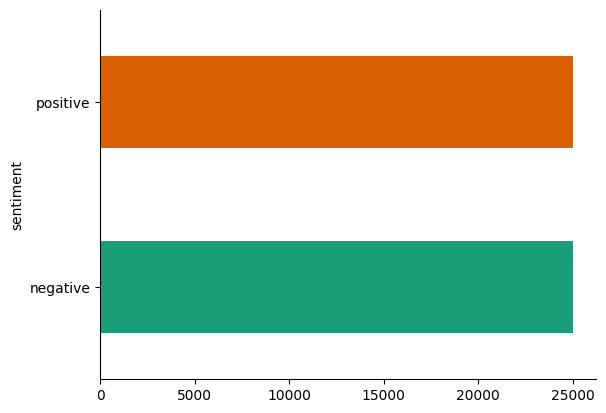

In [10]:
#Plot bar chart for positive and negative sentiment reviews
imdb_db.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Reviews length




In [16]:
#Create a review_length column
imdb_db['review_length'] = imdb_db['review'].str.len()

In [19]:
#Longest review
imdb_db[imdb_db['review_length'] == imdb_db['review_length'].max()]

,review,sentiment,review_length
31481,match tag team table match bubba ray spike dud...,positive,9444


In [20]:
#Shortest review
imdb_db[imdb_db['review_length'] == imdb_db['review_length'].min()]

,review,sentiment,review_length
27521,read book forget movie,negative,22
31072,what script story mess,negative,22


In [22]:
#Descriptive statistics for review_length
imdb_db['review_length'].describe()

count    50000.000000
mean       854.399620
std        653.266907
min         22.000000
25%        452.000000
50%        630.000000
75%       1039.000000
max       9444.000000
Name: review_length, dtype: float64

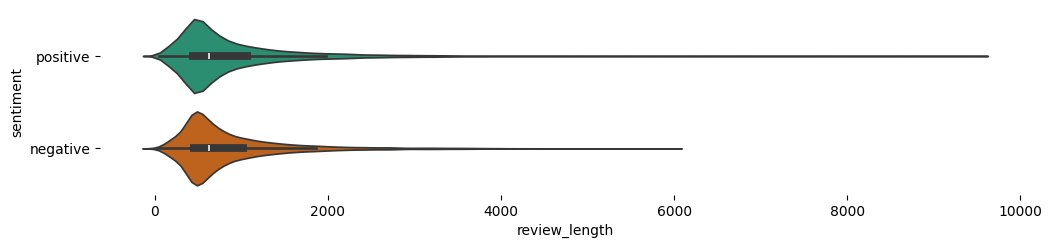

In [21]:
#Plot the distribution of reviews length with respect to the sentiment label
figsize = (12, 1.2 * len(imdb_db['sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(imdb_db, x='review_length', y='sentiment', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Word Cloud

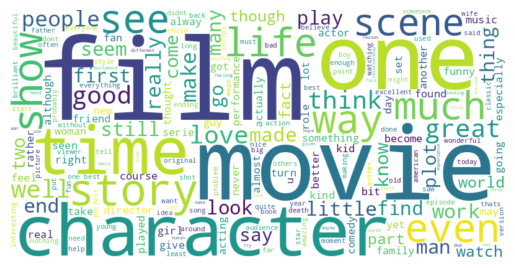

In [25]:
#Word Cloud for positive review
from wordcloud import WordCloud
positive_reviews = imdb_db[imdb_db['sentiment'] == 'positive']['review']
positive_reviews = " ".join(positive_reviews)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.show()

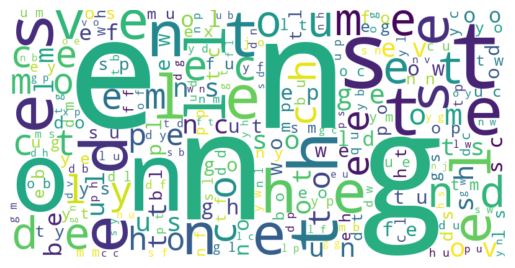

In [26]:
#Word Cloud for negative review
negative_reviews = imdb_db[imdb_db['sentiment'] == 'negative']['review']
negative_reviews = " ".join(positive_reviews)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.show()

*   Are positive review longer than negative ones?